In [1]:
#Importando as bibliotecas para análise do problema e configurando o notebook

## OS para executar comandos de diretorio
import os

## Habilitar Google Drive no Colab
# from google.colab import drive
# drive.mount('/content/drive')

## NumPy para manipular matrizes e vetores
import numpy as np

## Pandas para manipular os dataframes
import pandas as pd

## Plotar figuras bonitas
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


1. Ajuste um modelo de SVM de margens rígidas para classificar as amostras linearmente separáveis do problema, considerando as variáveis de entrada "petal length in cm" e "petal width in cm" do banco de dados.  Adicione o ponto [2.5, 1.1] do tipo Iris setosa e explique o que acontece com a margem rígida da SVM.

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline # biblioteca para executar sequencia de codigos repetitivos
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
])

svm_clf.fit(X, y)

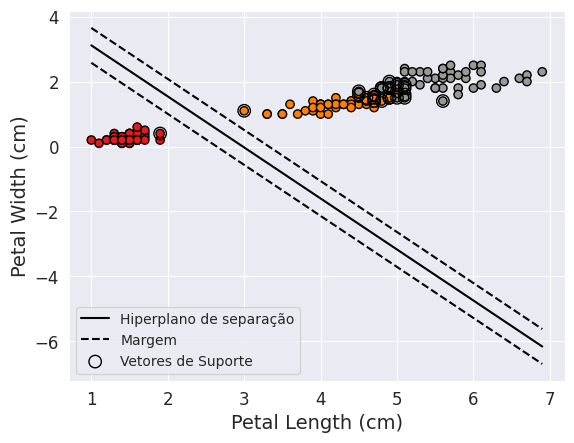

In [7]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Carregando o dataset Iris
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Utilizando as variáveis "petal length" e "petal width"
y = iris.target

# Ajustando o modelo de SVM de margens rígidas
svm_model = svm.SVC(kernel='linear', C=1.0)
svm_model.fit(X, y)

# Obtendo os hiperplanos e margem
w = svm_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
yy = a * xx - (svm_model.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(svm_model.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

# Plotando os dados de cada classe
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

# Plotando os hiperplanos e margem
plt.plot(xx, yy, 'k-', label='Hiperplano de separação')
plt.plot(xx, yy_down, 'k--', label='Margem')
plt.plot(xx, yy_up, 'k--')

# Marcando os vetores de suporte
plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1],
            facecolors='none', edgecolors='k', s=80, label='Vetores de Suporte')

# Configurando os eixos e legenda
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()

# Exibindo o gráfico
plt.show()
